In [1]:
# Your code here we are doing together looking for a breast cancer classification 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column',None)


In [3]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
from ucimlrepo import fetch_ucirepo
cancer = fetch_ucirepo(id=17)
x = cancer.data.features
y = cancer.data.targets

In [25]:
y = cancer.data.targets.squeeze() # bu kod tek kolonlu dataframe i series e cevirir

In [5]:

main_df = pd.DataFrame(x,columns=cancer.data.feature_names)

In [6]:
main_df['target']=y

In [19]:
# b = bad tumor
# m = good tumor
main_df.value_counts('target')


target
B    357
M    212
Name: count, dtype: int64

In [26]:
main_df['target'] = y.map({'B':0,'M':1})

In [7]:
main_df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [8]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [9]:
main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius1,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture1,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter1,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area1,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness1,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness1,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity1,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points1,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry1,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension1,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [10]:
# max / median  
# std / mean    
# count → mean/median → std → max → scale 

In [11]:
#radius =	Hücre büyüklüğü
#texture=Yüzey pürüzlülüğü
#perimeter=	Çevre uzunluğu
#area	= hucre Alani
#smoothness =	Kenar düzgünlüğü
#compactness= Ne kadar sıkı
#concavity=İçe çöküklük
#concave_points=Çökük nokta sayısı
#symmetry=Simetri
#fractal_dimension=	Kenar karmaşıklığı
#1’ler → genel yapı
#2’ler → kararsızlık / düzensizlik
#3’ler → agresiflik sinyali

In [12]:
# area1,area2,area3 i suspecious

In [13]:
# in my opinion pca fits perfectly in this data

In [14]:
main_df.isna().sum().sum()

np.int64(0)

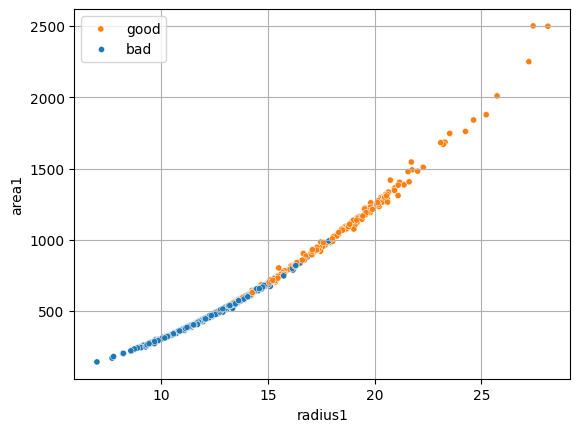

In [39]:
sns.scatterplot(data=main_df,x='radius1',y='area1',s=20,hue='target')
plt.grid()
plt.legend(['good','bad'])
#this one is a right skewed and area1 has a outlier

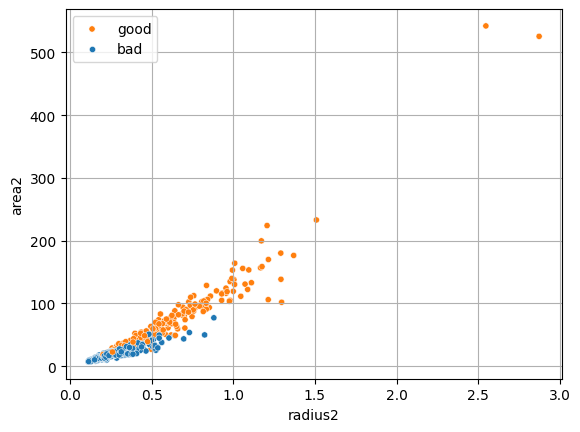

In [38]:
sns.scatterplot(data=main_df,x='radius2',y='area2',s=20,hue='target')
plt.grid()
plt.legend(['good','bad'])
#area 2 has a outlier

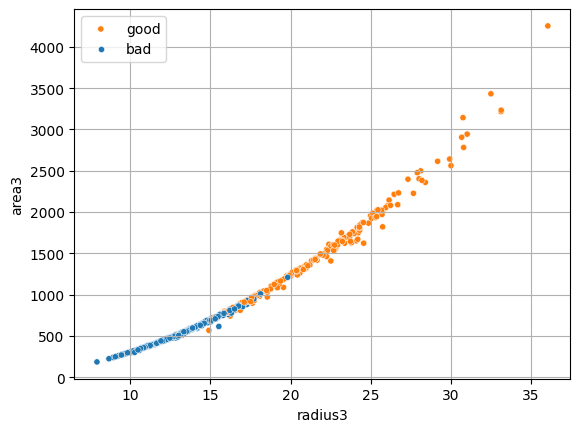

In [37]:
sns.scatterplot(data=main_df,x='radius3',y='area3',s=20,hue='target')
plt.grid()
plt.legend(['good','bad'])
#this one is a right skewed and area1 has a outlier

In [27]:
main_df.corr()['texture1'].sort_values(ascending=False)

texture1              1.000000
texture3              0.912045
target                0.415185
texture2              0.386358
perimeter3            0.358040
radius3               0.352573
area3                 0.343546
perimeter1            0.329533
radius1               0.323782
area1                 0.321086
concavity1            0.302418
concavity3            0.301025
concave_points3       0.295316
concave_points1       0.293464
perimeter2            0.281673
compactness3          0.277830
radius2               0.275869
area2                 0.259845
compactness1          0.236702
compactness2          0.191975
concave_points2       0.163851
concavity2            0.143293
fractal_dimension3    0.119205
symmetry3             0.105008
smoothness3           0.077503
symmetry1             0.071401
fractal_dimension2    0.054458
symmetry2             0.009127
smoothness2           0.006614
smoothness1          -0.023389
fractal_dimension1   -0.076437
Name: texture1, dtype: float64

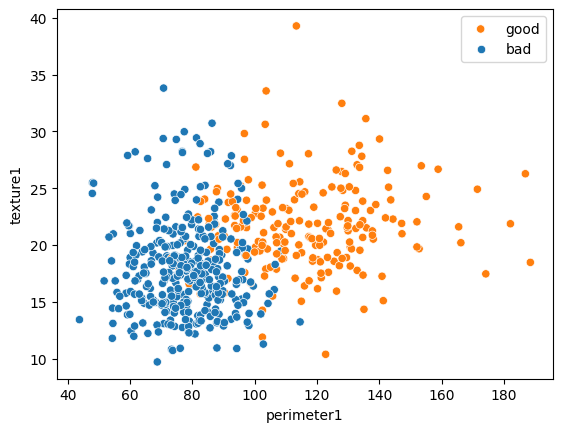

In [36]:
sns.scatterplot(data=main_df,x='perimeter1',y='texture1',hue='target')
plt.legend(['good','bad'])

In [28]:
main_df.corr()['compactness1'].sort_values(ascending=False)

compactness1          1.000000
concavity1            0.883121
compactness3          0.865809
concave_points1       0.831135
concavity3            0.816275
concave_points3       0.815573
compactness2          0.738722
fractal_dimension3    0.687382
smoothness1           0.659123
concave_points2       0.642262
symmetry1             0.602641
target                0.596534
perimeter3            0.590210
concavity2            0.570517
smoothness3           0.565541
fractal_dimension1    0.565369
perimeter1            0.556936
perimeter2            0.548905
radius3               0.535315
symmetry3             0.510223
area3                 0.509604
fractal_dimension2    0.507318
radius1               0.506124
area1                 0.498502
radius2               0.497473
area2                 0.455653
texture3              0.248133
texture1              0.236702
symmetry2             0.229977
smoothness2           0.135299
texture2              0.046205
Name: compactness1, dtype: float64

In [29]:
main_df.corr()['target'].sort_values(ascending=False)

target                1.000000
concave_points3       0.793566
perimeter3            0.782914
concave_points1       0.776614
radius3               0.776454
perimeter1            0.742636
area3                 0.733825
radius1               0.730029
area1                 0.708984
concavity1            0.696360
concavity3            0.659610
compactness1          0.596534
compactness3          0.590998
radius2               0.567134
perimeter2            0.556141
area2                 0.548236
texture3              0.456903
smoothness3           0.421465
symmetry3             0.416294
texture1              0.415185
concave_points2       0.408042
smoothness1           0.358560
symmetry1             0.330499
fractal_dimension3    0.323872
compactness2          0.292999
concavity2            0.253730
fractal_dimension2    0.077972
symmetry2            -0.006522
texture2             -0.008303
fractal_dimension1   -0.012838
smoothness2          -0.067016
Name: target, dtype: float64

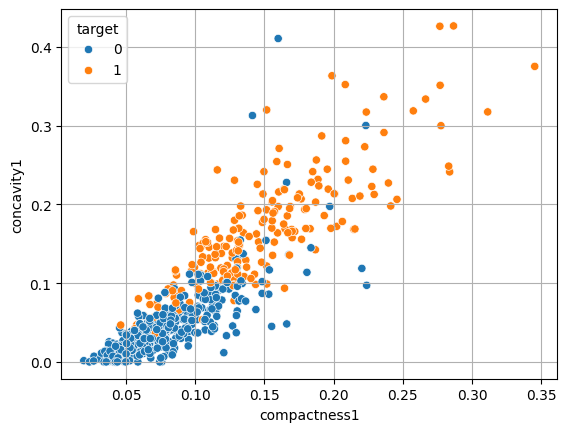

In [41]:
sns.scatterplot(data=main_df,x='compactness1',y='concavity1',hue='target')
plt.grid()

<Axes: >

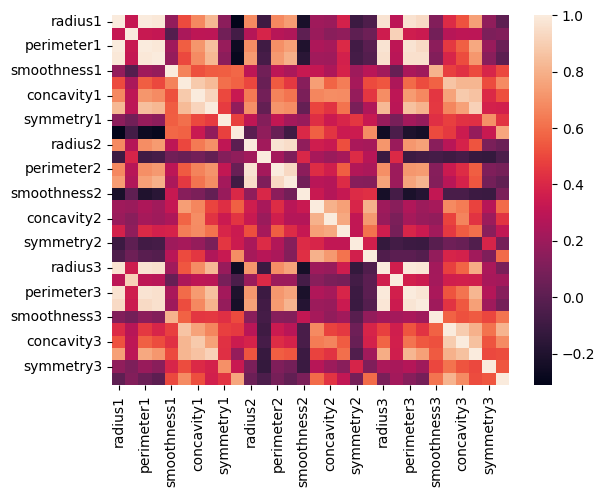

In [ ]:
sns.heatmap(data=main_df.corr())

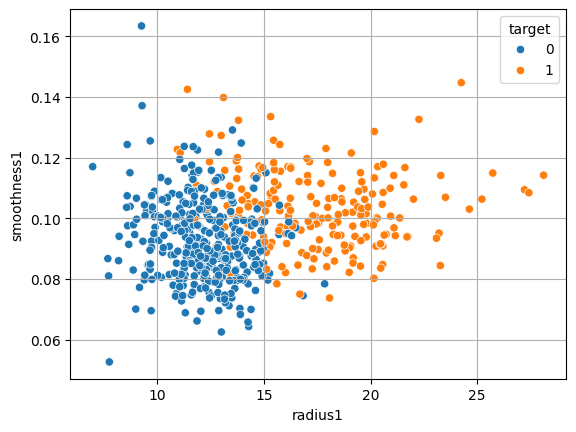

In [42]:
sns.scatterplot(data=main_df,x='radius1',y='smoothness1',hue='target')
plt.grid()

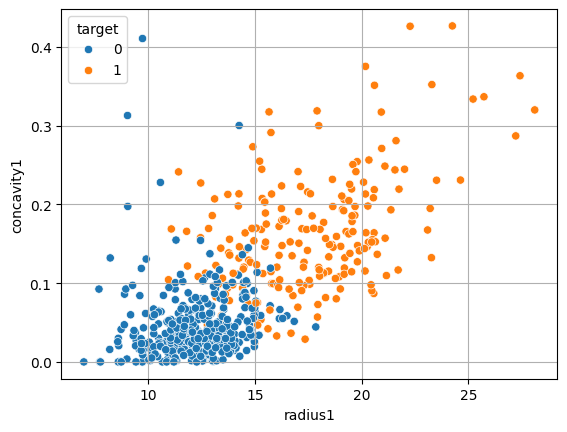

In [43]:
sns.scatterplot(data=main_df,x='radius1',y='concavity1',hue='target')
plt.grid()

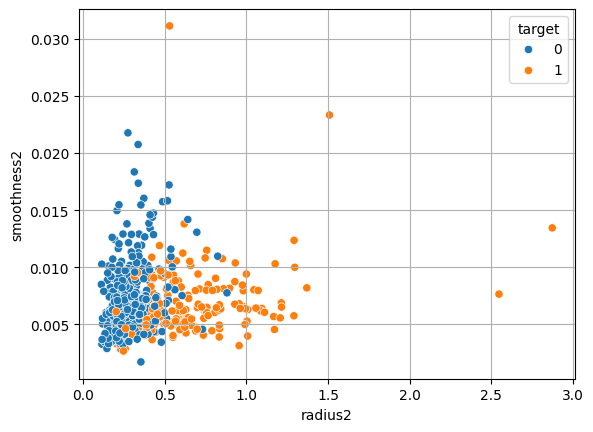

In [44]:
sns.scatterplot(data=main_df,x='radius2',y='smoothness2',hue='target')
plt.grid()

In [ ]:
# “They look like outliers, but they may be clinically meaningful, so I did not apply log transformation or clipping.

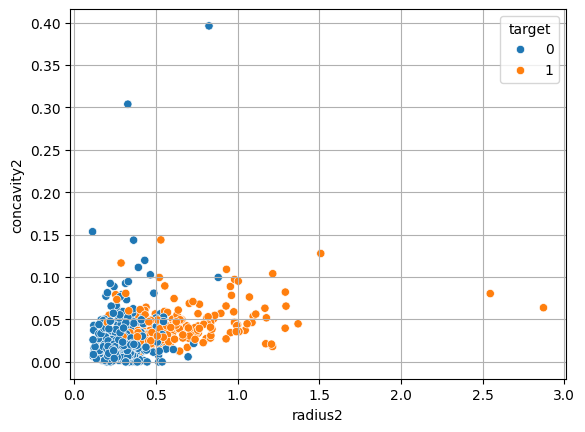

In [45]:
sns.scatterplot(data=main_df,x='radius2',y='concavity2',hue='target')
plt.grid()

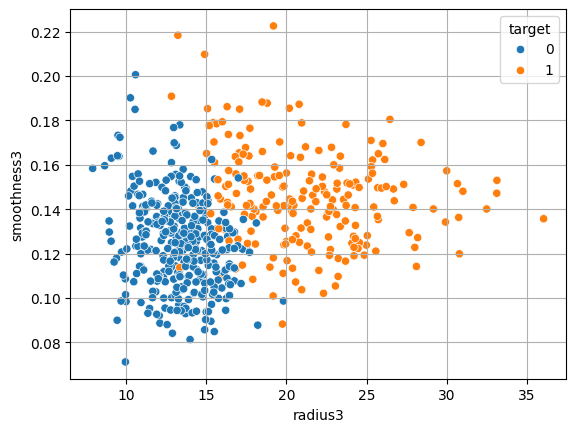

In [46]:
sns.scatterplot(data=main_df,x='radius3',y='smoothness3',hue='target')
plt.grid()

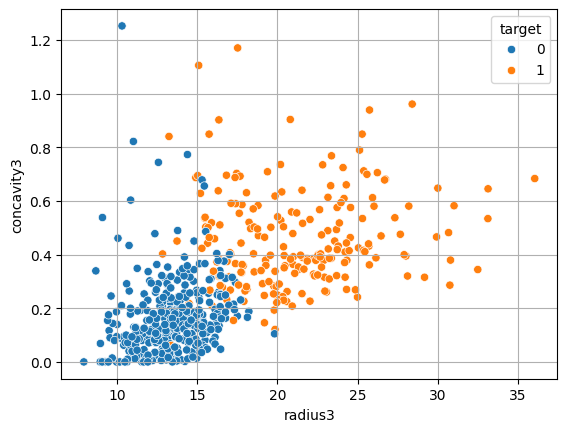

In [47]:
sns.scatterplot(data=main_df,x='radius3',y='concavity3',hue='target')
plt.grid()

In [49]:
main_df.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'target'],
      dtype='object')

In [60]:
copy_df = main_df[['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3','target']].copy()

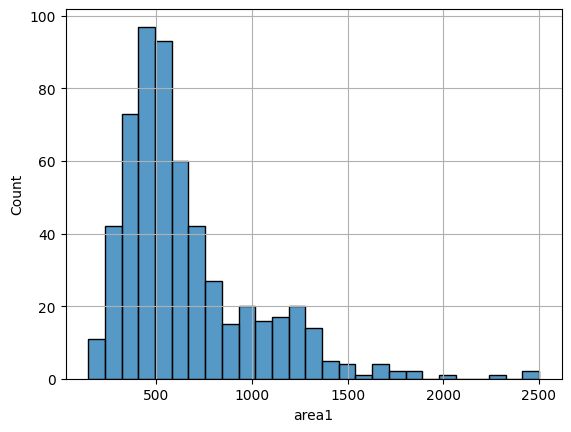

In [61]:
sns.histplot(copy_df['area1'])
plt.grid()

In [62]:
from sklearn.cluster import KMeans


In [63]:
cluster_k = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=46)
    km.fit(copy_df)
    cluster_k.append(km.inertia_)

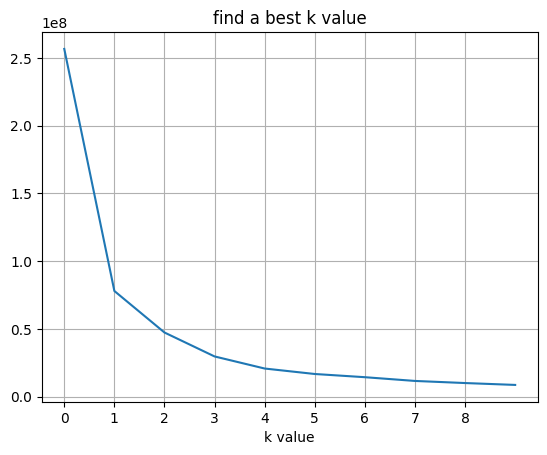

In [ ]:
sns.lineplot(data=cluster_k)
plt.xticks(range(0, 9))
plt.title('find a best k value')
plt.xlabel('k value')
plt.grid()
#k=4

In [68]:
cluster_model = KMeans(n_clusters=4)
cluster_model.fit(copy_df)
copy_df['cluster'] = cluster_model.predict(copy_df)

In [69]:
copy_df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target,cluster
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,2
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,2
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,2
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,2


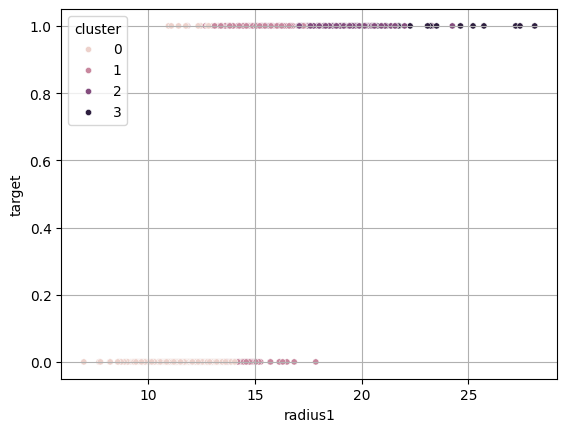

In [71]:
sns.scatterplot(data=copy_df,x='radius1',y='target',s=20,hue='cluster')
plt.grid()


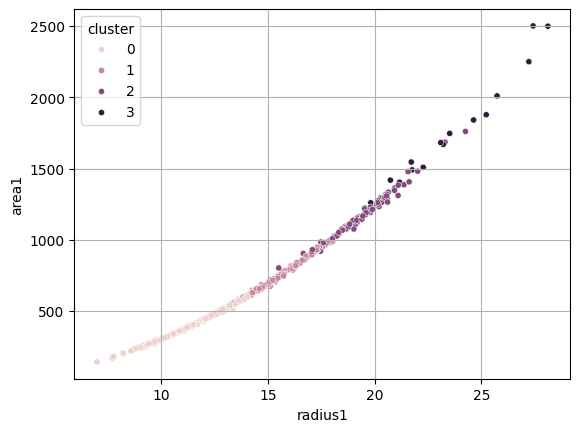

In [ ]:
sns.scatterplot(data=copy_df,x='radius1',y='area1',s=20,hue='cluster')
plt.grid()


In [72]:
# clusters seperate to tumor size

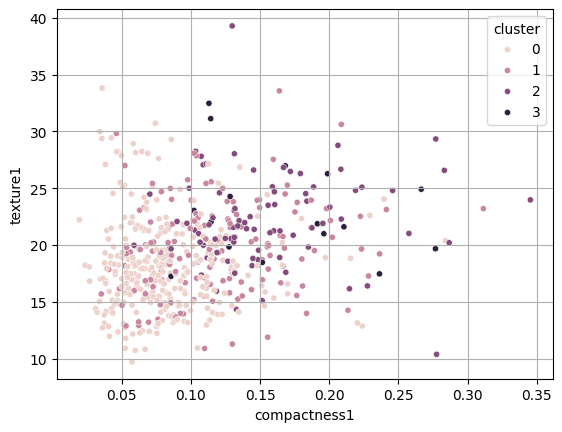

In [73]:
sns.scatterplot(data=copy_df,x='compactness1',y='texture1',s=20,hue='cluster')
plt.grid()


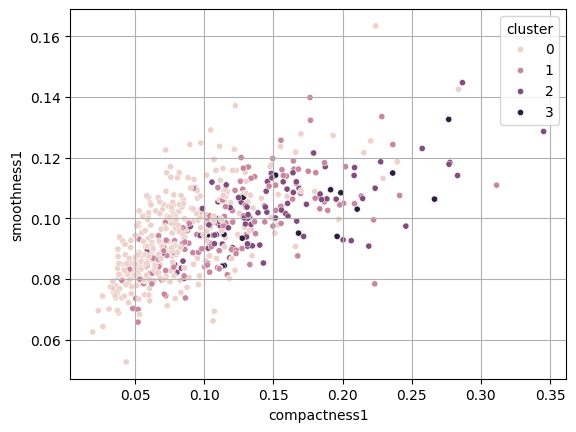

In [74]:
sns.scatterplot(data=copy_df,x='compactness1',y='smoothness1',s=20,hue='cluster')
plt.grid()


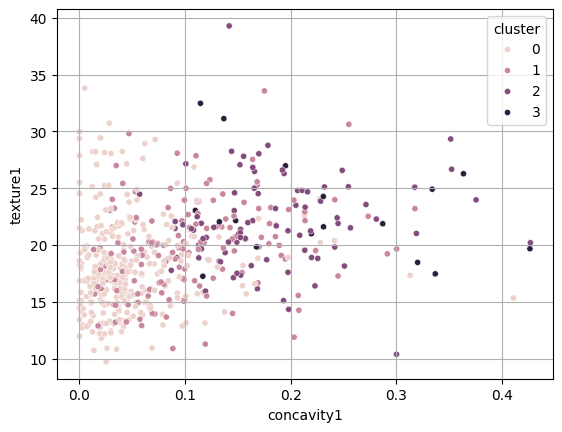

In [75]:
sns.scatterplot(data=copy_df,x='concavity1',y='texture1',s=20,hue='cluster')
plt.grid()


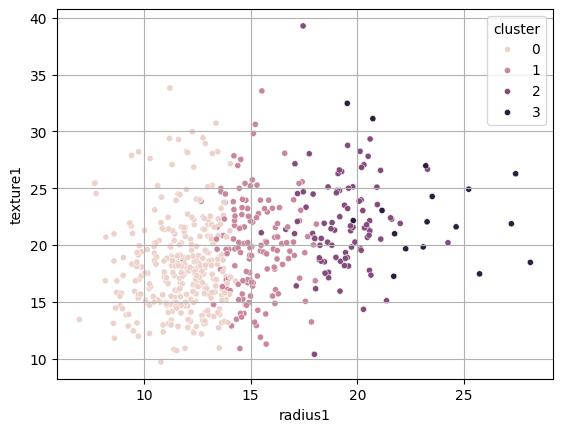

In [76]:
sns.scatterplot(data=copy_df,x='radius1',y='texture1',s=20,hue='cluster')
plt.grid()


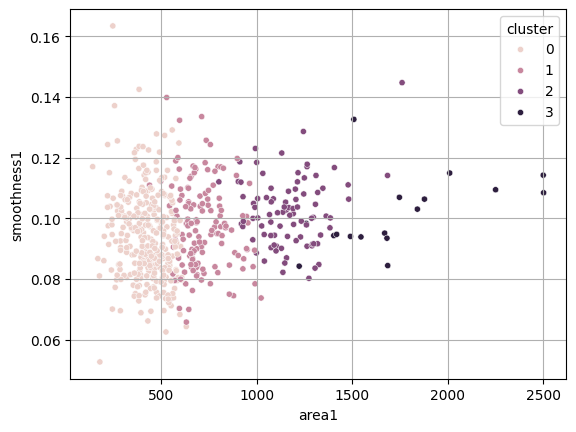

In [77]:
sns.scatterplot(data=copy_df,x='area1',y='smoothness1',s=20,hue='cluster')
plt.grid()


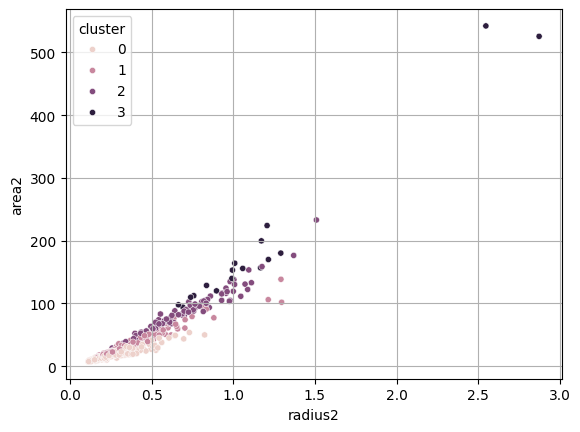

In [78]:
sns.scatterplot(data=copy_df,x='radius2',y='area2',s=20,hue='cluster')
plt.grid()


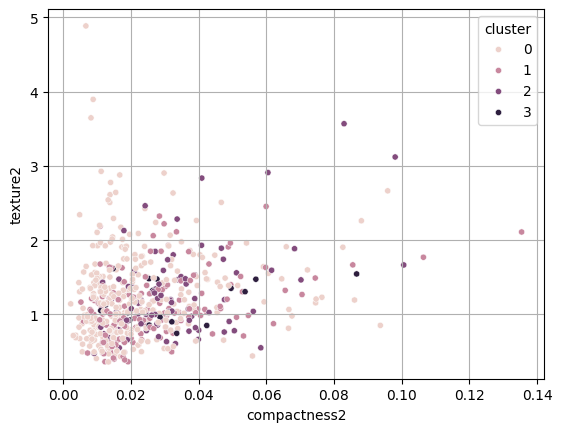

In [79]:
sns.scatterplot(data=copy_df,x='compactness2',y='texture2',s=20,hue='cluster')
plt.grid()


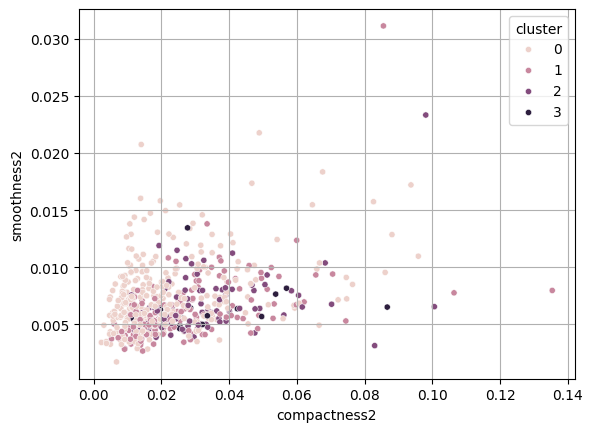

In [80]:
sns.scatterplot(data=copy_df,x='compactness2',y='smoothness2',s=20,hue='cluster')
plt.grid()


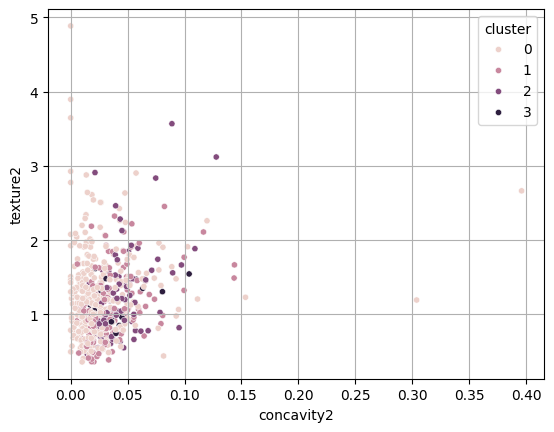

In [81]:
sns.scatterplot(data=copy_df,x='concavity2',y='texture2',s=20,hue='cluster')
plt.grid()


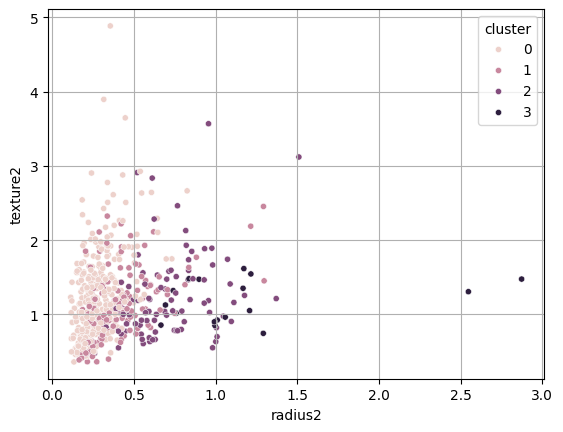

In [82]:
sns.scatterplot(data=copy_df,x='radius2',y='texture2',s=20,hue='cluster')
plt.grid()


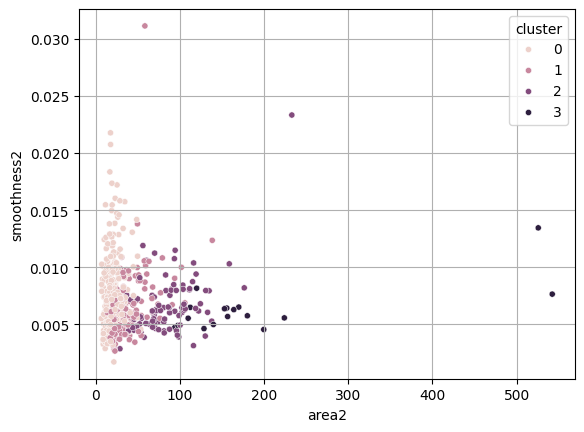

In [83]:
sns.scatterplot(data=copy_df,x='area2',y='smoothness2',s=20,hue='cluster')
plt.grid()


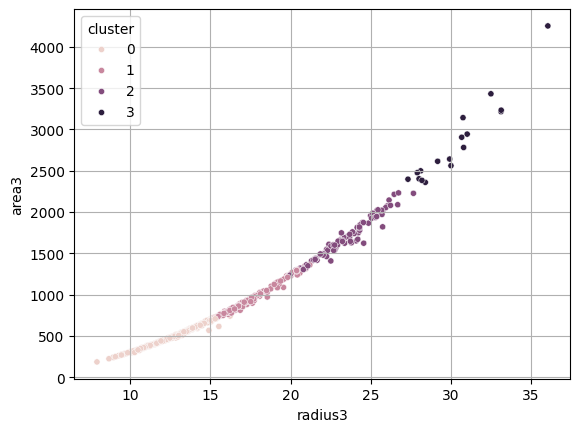

In [84]:
sns.scatterplot(data=copy_df,x='radius3',y='area3',s=20,hue='cluster')
plt.grid()


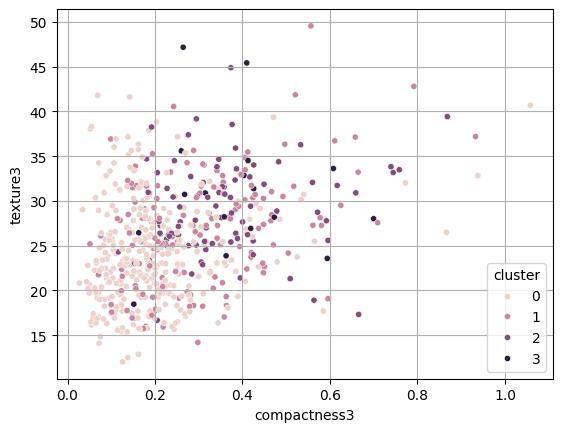

In [85]:
sns.scatterplot(data=copy_df,x='compactness3',y='texture3',s=20,hue='cluster')
plt.grid()


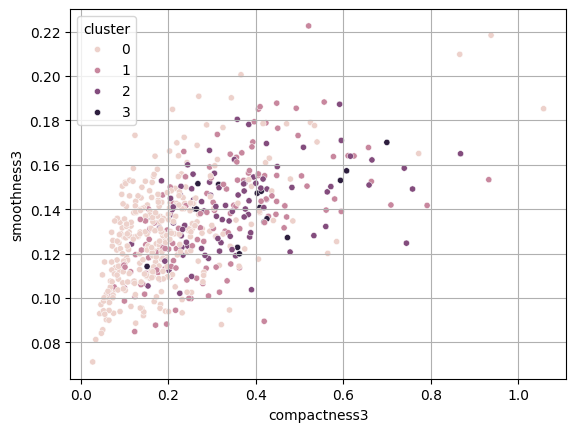

In [86]:
sns.scatterplot(data=copy_df,x='compactness3',y='smoothness3',s=20,hue='cluster')
plt.grid()


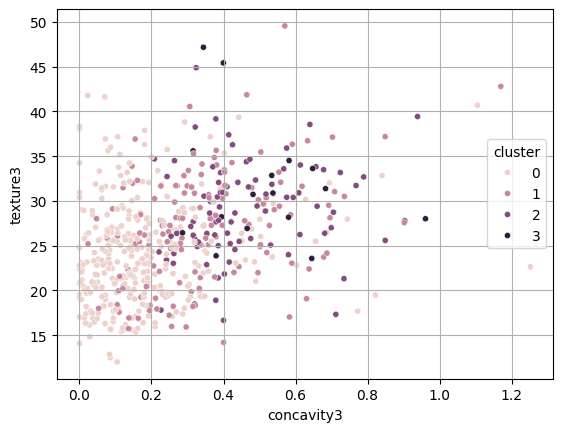

In [87]:
sns.scatterplot(data=copy_df,x='concavity3',y='texture3',s=20,hue='cluster')
plt.grid()


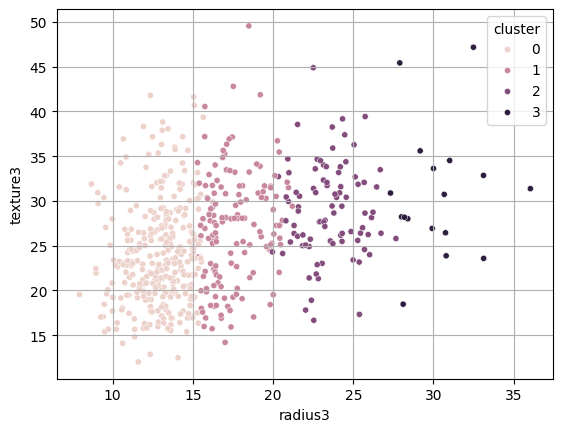

In [88]:
sns.scatterplot(data=copy_df,x='radius3',y='texture3',s=20,hue='cluster')
plt.grid()


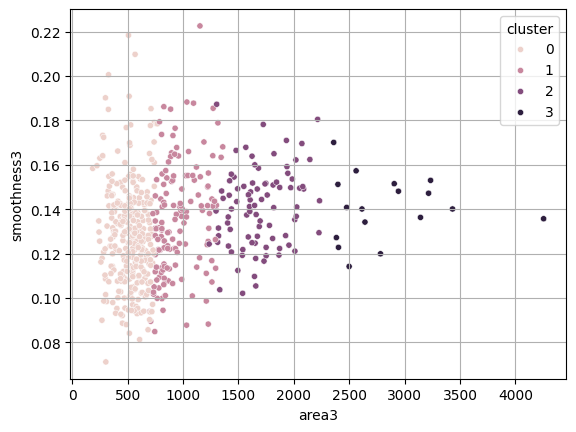

In [89]:
sns.scatterplot(data=copy_df,x='area3',y='smoothness3',s=20,hue='cluster')
plt.grid()


<Axes: xlabel='cluster', ylabel='target'>

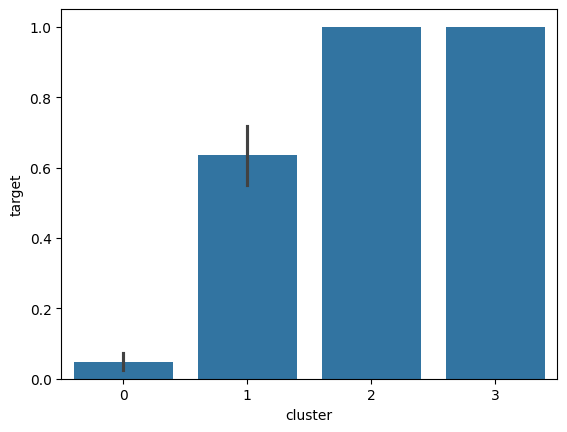

In [ ]:
sns.barplot(data=copy_df, x='cluster', y='target')
# “Some clusters are mostly good tumors, while others are almost entirely bad tumors.”

<Axes: xlabel='cluster', ylabel='compactness1'>

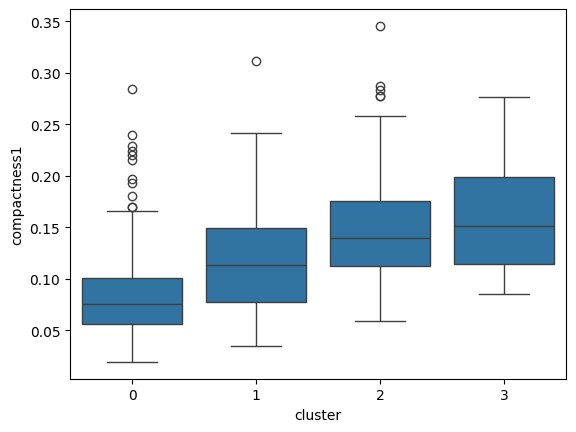

In [92]:
sns.boxplot(data=copy_df, x='cluster', y='compactness1')

In [93]:
copy_df.groupby('cluster').mean()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,11.716643,18.140690,75.300031,427.600000,0.094017,0.081970,0.047577,0.025409,0.176537,0.063934,0.279909,1.258274,1.970466,20.047110,0.007502,0.021958,0.026459,0.009846,0.021212,0.003756,12.939182,23.979906,84.138934,519.238871,0.128565,0.194207,0.175870,0.075195,0.277285,0.082078,0.047022
1,15.163517,19.801310,99.161862,715.441379,0.097337,0.117866,0.107192,0.058652,0.183219,0.061776,0.403319,1.109611,2.865331,38.545655,0.006321,0.027797,0.035054,0.012924,0.019082,0.003674,17.577724,26.828759,116.595931,955.204138,0.134691,0.306587,0.344143,0.139946,0.303866,0.086198,0.634483
2,19.360682,21.901818,128.156818,1169.005682,0.102226,0.151667,0.181105,0.102432,0.194489,0.061202,0.712031,1.251126,5.015864,87.423977,0.006694,0.032910,0.044056,0.016221,0.020854,0.004200,23.474773,28.917727,156.845455,1689.306818,0.140747,0.360042,0.458114,0.194053,0.313951,0.087431,1.000000
3,23.433529,22.963529,156.082353,1742.117647,0.101643,0.163789,0.227629,0.130059,0.181406,0.058446,1.183059,1.176918,8.549412,192.608235,0.006336,0.033282,0.043962,0.015871,0.018822,0.003448,30.295294,30.930588,204.852941,2838.294118,0.140571,0.387412,0.503412,0.226765,0.288876,0.081751,1.000000


In [94]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [95]:
copy1_df =main_df[['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3','target']].copy()


In [96]:
ss = StandardScaler()
scaled_df=ss.fit_transform(copy1_df)
scaled_df= pd.DataFrame(scaled_df,columns=copy1_df.columns)
scaled_df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1.297676
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1.297676
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1.297676
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1.297676
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1.297676


In [ ]:
#After scaling the data, we rechecked the number of clusters
cluster_k = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=46)
    km.fit(copy1_df)
    cluster_k.append(km.inertia_)

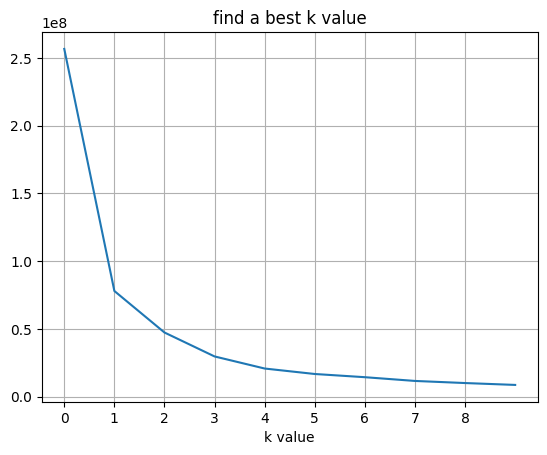

In [97]:
sns.lineplot(data=cluster_k)
plt.xticks(range(0, 9))
plt.title('find a best k value')
plt.xlabel('k value')
plt.grid()
#k=4

In [98]:
scaled_cluster_model = KMeans(n_clusters=4)
scaled_cluster_model.fit(scaled_df)
scaled_df['cluster'] = scaled_cluster_model.predict(scaled_df)

In [99]:
scaled_df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target,cluster
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1.297676,3
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1.297676,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1.297676,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1.297676,3
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1.297676,1


In [100]:
scaled_df.groupby('cluster').mean()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.437015,-0.258431,-0.466709,-0.446277,-0.548371,-0.704370,-0.682554,-0.673377,-0.460917,-0.400950,-0.466483,-0.139820,-0.479855,-0.413576,-0.294295,-0.586190,-0.479464,-0.595575,-0.210317,-0.467322,-0.481790,-0.268287,-0.509787,-0.477252,-0.523747,-0.621788,-0.640601,-0.676326,-0.365362,-0.532169,-0.622344
1,1.432423,0.535611,1.409354,1.451874,0.200456,0.518036,0.865692,1.152950,0.115524,-0.587326,1.097116,-0.071525,1.017616,1.114661,-0.204477,0.128627,0.199015,0.514570,-0.193351,-0.128628,1.474253,0.508511,1.429114,1.469425,0.258606,0.414327,0.659348,1.045444,0.151890,-0.121900,1.297676
2,-0.635976,-0.161288,-0.601497,-0.600435,0.505580,0.215819,-0.098356,-0.228991,0.244810,0.845720,-0.270842,0.326695,-0.218063,-0.350176,0.843803,0.552755,0.318588,0.375616,0.336435,0.718649,-0.623231,-0.185162,-0.579075,-0.578675,0.403854,0.108114,-0.035169,-0.177176,-0.056897,0.499113,-0.396178
3,0.524944,0.495195,0.642537,0.460954,1.208405,1.896780,1.733680,1.387218,1.473094,1.378034,0.599970,0.158280,0.714392,0.471561,0.131221,1.434495,1.253010,1.074886,0.709954,1.047658,0.630085,0.641560,0.763648,0.530440,1.178623,1.920168,1.813259,1.508835,1.543539,1.772824,1.192509


In [101]:
scaled_df.isna().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
target                0
cluster               0
dtype: int64

In [102]:
scaled_df.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target,cluster
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,2.372638e-16,-1.123881e-16,-1.123881e-16,-1.311195e-16,-1.529727e-16,1.748260e-16,1.623384e-16,0.000000,8.741299e-17,-6.243785e-18,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16,4.995028e-17,0.920914
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.051023
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,-1.059924e+00,-1.554264e+00,-1.044049e+00,-7.378291e-01,-1.776065e+00,-1.298098e+00,-1.057501e+00,-1.913447,-1.532890e+00,-1.096968e+00,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00,-7.706085e-01,0.000000
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,-6.235706e-01,-6.948092e-01,-6.237679e-01,-4.947542e-01,-6.240183e-01,-6.929263e-01,-5.571612e-01,-0.674490,-6.516807e-01,-5.851185e-01,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01,-7.706085e-01,0.000000
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,-2.922452e-01,-1.974976e-01,-2.866520e-01,-3.477828e-01,-2.203352e-01,-2.810204e-01,-1.990654e-01,-0.140496,-2.194304e-01,-2.299405e-01,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01,-7.706085e-01,1.000000
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,2.660996e-01,4.665523e-01,2.430307e-01,1.067726e-01,3.683553e-01,3.896541e-01,3.367521e-01,0.472657,3.556925e-01,2.886421e-01,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01,1.297676e+00,2.000000
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,8.906909e+00,6.655279e+00,9.461986e+00,1.104184e+01,8.029999e+00,6.143482e+00,1.207268e+01,6.649601,7.071917e+00,9.851593e+00,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00,1.297676e+00,3.000000


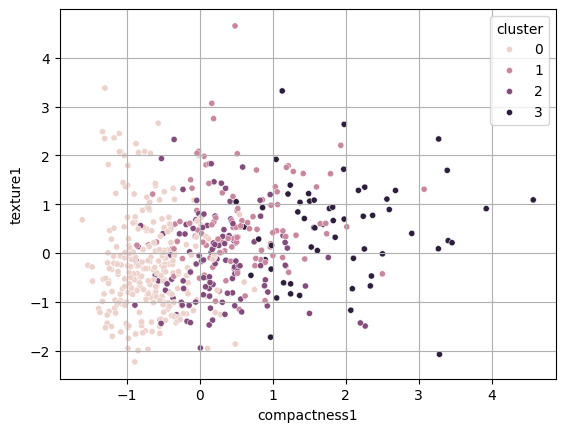

In [103]:
sns.scatterplot(data=scaled_df,x='compactness1',y='texture1',s=20,hue='cluster')
plt.grid()


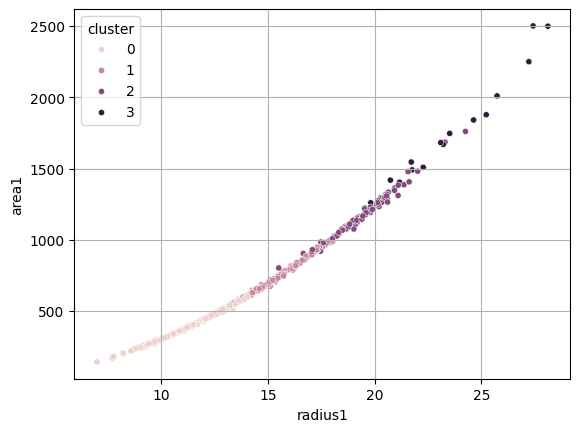

In [104]:
sns.scatterplot(data=copy_df,x='radius1',y='area1',s=20,hue='cluster')
plt.grid()


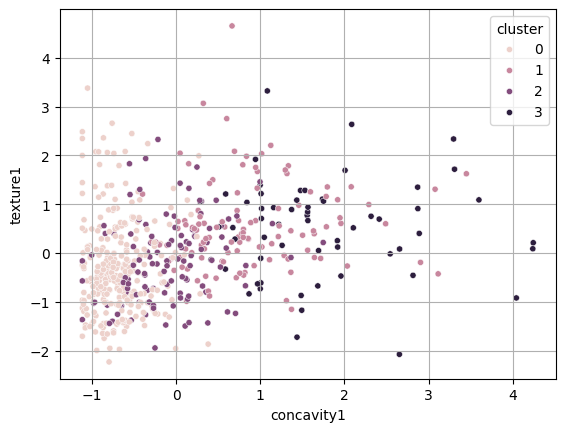

In [105]:
sns.scatterplot(data=scaled_df,x='concavity1',y='texture1',s=20,hue='cluster')
plt.grid()


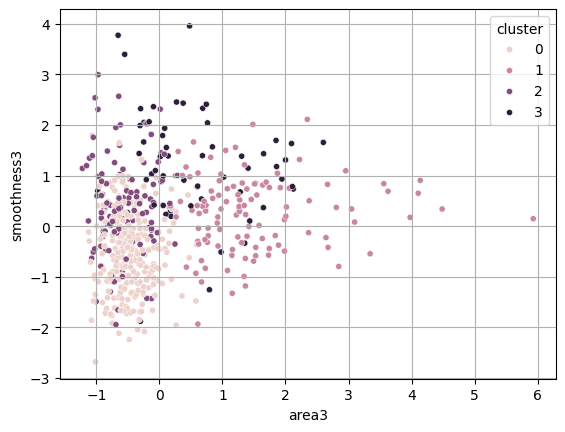

In [106]:
sns.scatterplot(data=scaled_df,x='area3',y='smoothness3',s=20,hue='cluster')
plt.grid()


In [107]:
# scaled works well

<Axes: xlabel='cluster', ylabel='area1'>

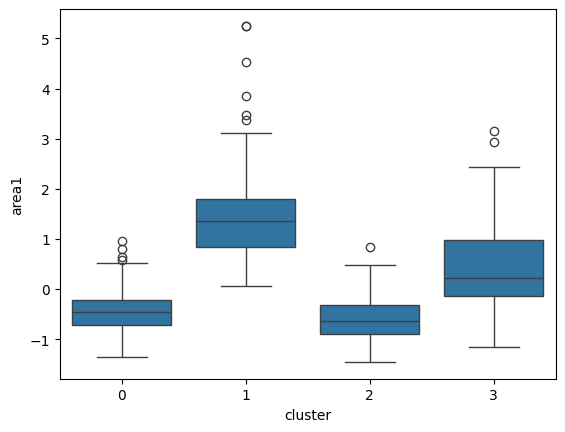

In [108]:
sns.boxplot(data=scaled_df, x='cluster', y='area1')

<Axes: xlabel='cluster', ylabel='compactness1'>

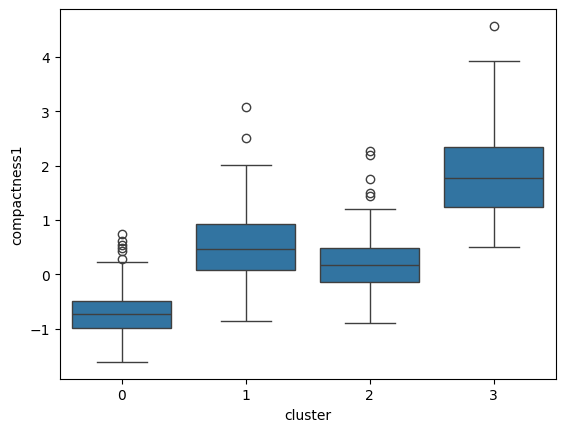

In [109]:
sns.boxplot(data=scaled_df, x='cluster', y='compactness1')

<Axes: xlabel='cluster', ylabel='target'>

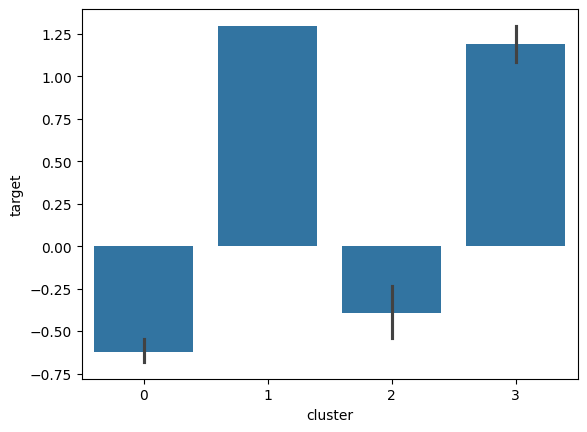

In [112]:
sns.barplot(data=scaled_df,y='target',x='cluster')

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
train_df,test_df = train_test_split(main_df,random_state=46)

In [116]:
train_df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target
315,12.490,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,0.1215,0.05673,0.1716,0.7151,1.0470,12.69,0.004928,0.003012,0.002620,0.003390,0.01393,0.001344,13.34,19.71,84.48,544.2,0.1104,0.04953,0.01938,0.02784,0.1917,0.06174,0
74,12.310,16.52,79.19,470.9,0.09172,0.06829,0.033720,0.022720,0.1720,0.05914,0.2505,1.0250,1.7400,19.68,0.004854,0.018190,0.018260,0.007965,0.01386,0.002304,14.11,23.21,89.71,611.1,0.1176,0.18430,0.17030,0.08660,0.2618,0.07609,0
449,21.100,20.52,138.10,1384.0,0.09684,0.11750,0.157200,0.115500,0.1554,0.05661,0.6643,1.3610,4.5420,81.89,0.005467,0.020750,0.031850,0.014660,0.01029,0.002205,25.68,32.07,168.20,2022.0,0.1368,0.31010,0.43990,0.22800,0.2268,0.07425,1
273,9.742,15.67,61.50,289.9,0.09037,0.04689,0.011030,0.014070,0.2081,0.06312,0.2684,1.4090,1.7500,16.39,0.013800,0.010670,0.008347,0.009472,0.01798,0.004261,10.75,20.88,68.09,355.2,0.1467,0.09370,0.04043,0.05159,0.2841,0.08175,0
468,17.600,23.33,119.00,980.5,0.09289,0.20040,0.213600,0.100200,0.1696,0.07369,0.9289,1.4650,5.8010,104.90,0.006766,0.070250,0.065910,0.023110,0.01673,0.011300,21.57,28.87,143.60,1437.0,0.1207,0.47850,0.51650,0.19960,0.2301,0.12240,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,12.940,16.17,83.18,507.6,0.09879,0.08836,0.032960,0.023900,0.1735,0.06200,0.1458,0.9050,0.9975,11.36,0.002887,0.012850,0.016130,0.007308,0.01870,0.001972,13.86,23.02,89.69,580.9,0.1172,0.19580,0.18100,0.08388,0.3297,0.07834,0
442,13.780,15.79,88.37,585.9,0.08817,0.06718,0.010550,0.009937,0.1405,0.05848,0.3563,0.4833,2.2350,29.34,0.006432,0.011560,0.007741,0.005657,0.01227,0.002564,15.27,17.50,97.90,706.6,0.1072,0.10710,0.03517,0.03312,0.1859,0.06810,0
372,21.370,15.10,141.30,1386.0,0.10010,0.15150,0.193200,0.125500,0.1973,0.06183,0.3414,1.3090,2.4070,39.06,0.004426,0.026750,0.034370,0.013430,0.01675,0.004367,22.69,21.84,152.10,1535.0,0.1192,0.28400,0.40240,0.19660,0.2730,0.08666,1
552,12.770,29.43,81.35,507.9,0.08276,0.04234,0.019970,0.014990,0.1539,0.05637,0.2409,1.3670,1.4770,18.76,0.008835,0.012330,0.013280,0.009305,0.01897,0.001726,13.87,36.00,88.10,594.7,0.1234,0.10640,0.08653,0.06498,0.2407,0.06484,0


In [117]:
test_df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target
302,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,1.0720,1.7430,7.804,130.80,0.007964,0.047320,0.07649,0.019360,0.02736,0.005928,23.680,29.43,158.80,1696.0,0.1347,0.33910,0.49320,0.19230,0.3294,0.09469,1
55,11.520,18.75,73.34,409.0,0.09524,0.05473,0.03036,0.02278,0.1920,0.05907,0.3249,0.9591,2.183,23.47,0.008328,0.008722,0.01349,0.008670,0.03218,0.002386,12.840,22.47,81.81,506.2,0.1249,0.08720,0.09076,0.06316,0.3306,0.07036,0
12,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,0.9555,3.5680,11.070,116.20,0.003139,0.082970,0.08890,0.040900,0.04484,0.012840,20.960,29.94,151.70,1332.0,0.1037,0.39030,0.36390,0.17670,0.3176,0.10230,1
446,17.750,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916,0.3897,1.0770,2.873,43.95,0.004714,0.020150,0.03697,0.011100,0.01237,0.002556,21.530,38.54,145.40,1437.0,0.1401,0.37620,0.63990,0.19700,0.2972,0.09075,1
10,16.020,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.01460,0.003042,19.190,33.88,123.80,1150.0,0.1181,0.15510,0.14590,0.09975,0.2948,0.08452,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,11.150,13.08,70.87,381.9,0.09754,0.05113,0.01982,0.01786,0.1830,0.06105,0.2251,0.7815,1.429,15.48,0.009019,0.008985,0.01196,0.008232,0.02388,0.001619,11.990,16.30,76.25,440.8,0.1341,0.08971,0.07116,0.05506,0.2859,0.06772,0
530,11.750,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,0.4384,1.9070,3.149,30.66,0.006587,0.018150,0.01737,0.013160,0.01835,0.002318,13.500,27.98,88.52,552.3,0.1349,0.18540,0.13660,0.10100,0.2478,0.07757,0
314,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,0.2163,0.07359,0.3368,2.7770,2.222,17.81,0.020750,0.014030,0.00000,0.000000,0.06146,0.006820,8.952,22.44,56.65,240.1,0.1347,0.07767,0.00000,0.00000,0.3142,0.08116,0
507,11.060,17.12,71.25,366.5,0.11940,0.10710,0.04063,0.04268,0.1954,0.07976,0.1779,1.0300,1.318,12.30,0.012620,0.023480,0.01800,0.012850,0.02220,0.008313,11.690,20.74,76.08,411.1,0.1662,0.20310,0.12560,0.09514,0.2780,0.11680,0
